In [3]:
pip install opendatasets

In [4]:
import keras
import random
import opendatasets as od
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [5]:
od.download("https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: not23rdlaura
Your Kaggle Key: ··········


100%|██████████| 2.47M/2.47M [00:00<00:00, 96.4MB/s]

In [6]:
File_in = ('/content/pokemon-images-and-types/pokemon.csv')
newData_in = pds.read_csv(File_in)
newData_in = newData_in.sort_values(by ='Name')
newData_in = newData_in.drop(labels = 'Name', axis = 1)
newData_in = pds.get_dummies(newData_in, dtype = int)
dataTypeValues = newData_in.values.tolist()
dataTypeValues = list(newData_in.itertuples(index = False, name = None))

print(dataTypeValues)
print(len(dataTypeValues))


[(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0,

In [ ]:
NUMBER_UNIQUE_TYPES = len(newData_in['Type1'].unique())
NUMBER_UNIQUE_TYPES

In [7]:
keras.utils.image_dataset_from_directory(directory = '/content/pokemon-images-and-types/images/images/', labels = dataTypeValues, label_mode = "categorical", image_size = (120,120))


Found 809 files belonging to 159 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36, 159), dtype=tf.float32, name=None))>

In [ ]:
def generador_de_imagenes():

    input = Input(shape=(100,))
    input_label = Input(shape=(NUMBER_UNIQUE_TYPES))

    x = Concatenate(axis=1)([input, input_label])

    x = (Dense(512*15*15))(x)
    #x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Reshape((15,15,512))(x)

    x = Conv2DTranspose(256,kernel_size=3, strides=2, padding = "same")(x)
    #x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2DTranspose(128,kernel_size=3, strides=2, padding = "same")(x)
    #x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2DTranspose(64,kernel_size=3, strides=2, padding = "same")(x)
    #x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    output = Conv2DTranspose(3,kernel_size=3, padding = "same", activation='tanh')(x)

    generador = Model(inputs=[input, input_label], outputs=output, name='generador')

    return generador

modelo_generador = generador_de_imagenes()
plot_model(modelo_generador, show_shapes=True, show_layer_names=False)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 128)         295040    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 2, 2, 128)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 128)         147584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 1, 1, 128)        

1/1 [==============================] - 0s 123ms/step


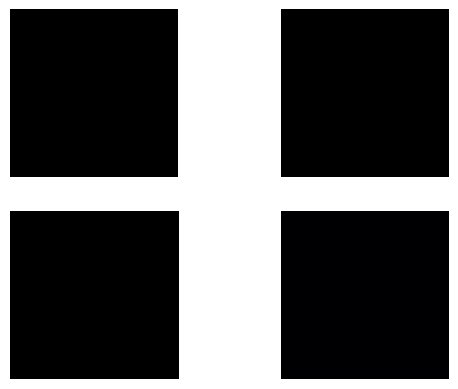

In [ ]:
def generar_datos_entrada(n_muestras):
  X = np.random.randn(100 * n_muestras)
  X = X.reshape(n_muestras, 100)
  return X

def crear_datos_fake(modelo_generador, n_muestras):
  input = generar_datos_entrada(n_muestras)
  X = modelo_generador.predict(input)
  y = np.zeros((n_muestras, 1))
  return X,y

numero_muestras = 4
X,_ = crear_datos_fake(modelo_generador, numero_muestras)

# Visualizamos resultados
for i in range(numero_muestras):
    plt.subplot(2, 2, 1 + i)
    plt.axis('off')
    plt.imshow(X[i])

In [ ]:
def discriminador_de_imagenes():

    input = Input(shape = (120,120,3))

    x = Conv2D(64, kernel_size=3, padding = "same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    #x = Dropout(0.2)(x)

    x = Conv2D(128, kernel_size=3,strides=(2,2), padding = "same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    #x = Dropout(0.2)(x)

    x = Conv2D(256, kernel_size=3,strides=(2,2), padding = "same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    #x = Dropout(0.2)(x)

    x = Conv2D(512, kernel_size=3, strides=(2,2), padding = "same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    #x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)
    output = Dense(1, activation='sigmoid')(x)
    output_label = Dense(18, activation='softmax')(x)


    discriminador = Model(inputs=input, outputs=[output, output_label], name='discriminador')

    return(discriminador)

modelo_discriminador = discriminador_de_imagenes()
plot_model(modelo_discriminador, show_shapes=True, show_layer_names=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 256)        

In [ ]:
modelo_discriminador.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
modelo_discriminador.trainable = False

z = Input(shape=(100,))
label = Input(shape=(18))
img = modelo_generador([z, label])

validity, target_label = modelo_discriminador(img)

combined = Model([z,label], [validity, target_label])
combined.compile(loss='binary_crossentropy', optimizer=Adam())

plot_model(combined, show_shapes=True, show_layer_names=False)

In [ ]:
def generate_random_labels(batch_size, array_length):
    batch = []
    for _ in range(batch_size):
        arr = np.zeros(array_length)

        random_position = random.randint(0, array_length - 1)
        arr[random_position] = 1

        batch.append(arr)

    return np.array(batch)

In [ ]:
def train(X_train, y_train, generator, discriminator, combined, epochs, batch_size=32, sample_interval=100):
    # Adversarial ground truths (-1 fake and 1 real)
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    history = {
        'd_loss' : [],
        'd_acc' : [],
        'g_loss' : []
    }

    for epoch in range(epochs):
        print("----EPOCH " + str(epoch) + '-----')
        for batch in range(int(len(X_train)/batch_size)):
            #  Train the Discriminator
            noise = np.random.normal(0, 1, (batch_size, 100))
            # Generar un batch de etiquetas de manera aleatoria
            gen_labels = generate_random_labels(batch_size, 10)
            # El generador ahora deberá admitir el noise la mismo tiempo que los gen_labels generados aleatoriamente
            gen_imgs = modelo_generador.predict([noise, gen_labels], verbose=0)

            imgs = X_train[batch*batch_size : (batch+1)*batch_size]

            # Obtener el batch correspondiente de etiquetas de y_train
            img_labels = y_train[batch*batch_size : (batch+1)*batch_size]

            # Añadir a las salidas deseadas del discriminador las etiquetas aleatorias y las obtenidas de y_train
            d_loss_real = modelo_discriminador.train_on_batch(imgs, [valid, img_labels])
            d_loss_fake = modelo_discriminador.train_on_batch(gen_imgs, [fake, gen_labels])
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train the Generator
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generar un batch de etiquetas de manera aleatoria
            gen_labels = generate_random_labels(batch_size, 10)

            # Añadir como entrada y salida las etiquetas generadas
            g_loss = combined.train_on_batch([noise, gen_labels], [valid, gen_labels])

            # Save losses
            history['d_loss'].append(d_loss[0])
            history['d_acc'].append(d_loss[3])
            history['g_loss'].append(g_loss)

            # Plot the progress
            if batch % 50 == 0:
                print ("%d [D loss: %.4f,\t acc.: %.2f%%]\t[G loss: %.4f]" % (batch, d_loss[0], 100*d_loss[3], g_loss[0]))

            if batch % 500 == 0:
                sample_images(epoch, batch, gen_imgs, gen_labels, imgs, img_labels)

        plot_losses(history)

In [ ]:
def sample_images(epoch, batch, gen_imgs, gen_labels, imgs, img_labels):
    plt.rcParams['figure.figsize'] = [15, 5]
    fig, axs = plt.subplots(2, 5)
    fig.suptitle('Epoch: ' + str(epoch) + ', Batch: ' + str(batch), fontsize=16)
    for i in range(5):
        axs[0,i].imshow(gen_imgs[i,:,:,0], cmap='Greys')
        axs[0,i].set_title(np.where(gen_labels[i]==1))
        axs[0,i].axis('off')

    for i in range(5):
        axs[1,i].imshow(imgs[i,:,:,0], cmap='Greys')
        axs[1,i].set_title(np.where(img_labels[i]==1))
        axs[1,i].axis('off')
    plt.show()
    plt.close()

In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()

    ax1.plot(history['d_loss'], label='D loss')
    ax1.plot(history['g_loss'], label='G loss')
    ax1.legend()

    ax2.set_title('D accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()

    ax2.plot(history['d_acc'], label='Accuracy')
    ax2.legend()

    plt.show()